# Caso práctico No. 1: La empresa Cyclistic


Este ejercicio corresponde al análisis de datos de la empresa cyclistic para extraer información y tendencias que nos permitan incrementar el número de suscriptores anuales que son quienes llevarán al éxito de la empresa. 

In [5]:
# Importación de las librerias de análisis
library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(lubridate)
library(skimr)
getwd()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "/kaggle/working"

# Caso práctico No. 1: La empresa Cyclistic
Este ejercicio corresponde al análisis de datos de la empresa cyclistic para 
extraer información y tendencias que nos permitan incrementar el número de 
suscriptores anuales. Nuestra directora de marketing asegura que la empresa 
tendrá éxito si maximizamos el número de suscripciones anuales. 

# Pregunta empresarial 
En esta fase se define el objetivo empresarial y la pregunta que queremos 
responder con datos. Para este caso la pregunta a responder es __¿En qué se 
diferencian los socios anuales y los ciclistas ocasionales con respecto al uso 
de las bicicletas de Cyclistic?__ 

Para responder la pregunta empresarial vamos a analizar 
datos que la empresa (ficticia) Cyclistic puso a nuestra disposición. Estos son 
datos de primera fuente ya que son recabados y almacenados por la empresa.
Los datos que vamos a analizar corresponden al año 2024 y se encuentran organizados por 
mes. A continuación podemos ver los archivos de datos: 

In [6]:
input_dir = "../input/bike-share-2024-data-analysis/"
dir1 = "202403-divvy-tripdata"
list.files(path=paste(input_dir,dir1, sep=""))

[1] "202403-divvy-tripdata.csv"

# Limpieza de los datos 

Lo siguiente es leer todos los datos y almacenarlos en variables:

In [7]:
trips_2024_01 <- read_csv(paste(input_dir,"202401-divvy-tripdata/202401-divvy-tripdata.csv", sep=""))
trips_2024_02 <- read_csv(paste(input_dir,"202402-divvy-tripdata/202402-divvy-tripdata.csv", sep=""))
trips_2024_03 <- read_csv(paste(input_dir,"202403-divvy-tripdata/202403-divvy-tripdata.csv", sep=""))
trips_2024_04 <- read_csv(paste(input_dir,"202404-divvy-tripdata/202404-divvy-tripdata.csv", sep=""))
trips_2024_05 <- read_csv(paste(input_dir,"202405-divvy-tripdata/202405-divvy-tripdata.csv", sep=""))
trips_2024_06 <- read_csv(paste(input_dir,"202406-divvy-tripdata/202406-divvy-tripdata.csv", sep=""))
trips_2024_07 <- read_csv(paste(input_dir,"202407-divvy-tripdata/202407-divvy-tripdata.csv", sep=""))
trips_2024_08 <- read_csv(paste(input_dir,"202408-divvy-tripdata/202408-divvy-tripdata.csv", sep=""))
trips_2024_09 <- read_csv(paste(input_dir,"202409-divvy-tripdata/202409-divvy-tripdata.csv", sep=""))
trips_2024_10 <- read_csv(paste(input_dir,"202410-divvy-tripdata/202410-divvy-tripdata.csv", sep=""))
trips_2024_11 <- read_csv(paste(input_dir,"202411-divvy-tripdata/202411-divvy-tripdata.csv", sep=""))
trips_2024_12 <- read_csv(paste(input_dir,"202412-divvy-tripdata/202412-divvy-tripdata.csv", sep=""))

Rows: 144873 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223164 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 301687 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

Para poder unir los dataframes tenemos que verificar que todos tengan las mismas
columnas. Hacemos esto con `colnames()`

In [8]:
colnames(trips_2024_01)
colnames(trips_2024_02)
colnames(trips_2024_03)
colnames(trips_2024_04)
colnames(trips_2024_05)
colnames(trips_2024_06)
colnames(trips_2024_07)
colnames(trips_2024_08)
colnames(trips_2024_09)
colnames(trips_2024_10)
colnames(trips_2024_11)
colnames(trips_2024_12)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Ahora juntamos todas las tablas en una sola con `bind_rows` y realizamos una primera inspección de todos los datos juntos con `skimr`:

In [9]:
all_trips_2024 <- bind_rows(trips_2024_01, trips_2024_02, trips_2024_03, 
                            trips_2024_04, trips_2024_05, trips_2024_06, 
                            trips_2024_07, trips_2024_08, trips_2024_09, 
                            trips_2024_10, trips_2024_11, trips_2024_12)

#skim_without_charts(all_trips_2024)

── Data Summary ────────────────────────
                           Values        
Name                       all_trips_2024
Number of rows             5860568       
Number of columns          13            
_______________________                  
Column type frequency:                   
  character                7             
  numeric                  4             
  POSIXct                  2             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      16  16     0  5860357          0
2 rideable_type              0         1      12  16     0        3          0
3 start_station_name   1073951         0.817  10  64     0     1808          0
4 start_station_id     1073951         0.817   3  35     0     1763          0
5 end_station_name  

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 20' in coercion to 'logical(1)'


En este dataframe hay alrededor de un millon de datos a los que les hace falta 
tanto el nombre como el id de la estación de inicio y de fin del viaje. Ya que 
no tenemos manera de saber como rellenar estos datos tenemos 2 opciones:
1. Podemos remover los valores faltantes ya que no disponemos la información 
necesaria para complementarlos
2. Podríamos relacionar la latitud y longitud de inicio y fin con el ID y nombre 
de estación, esto porque los datos de latitud y longitud faltantes son alrededor 
de 7000. Para poder relacionar este procedimiento tendríamos que hacer un match 
perfecto de latitudes y longitudes. 

Para este caso vamos simplemente a remover las filas que tienen datos faltantes.
Esto nos deja con alrededor de 4 millones de datos que aun son suficientes para 
responder a la pregunta inicial. En una situación real lo ideal sería preguntar 
a nuestro responsable superior la manera en la que tratariamos los datos 
faltantes.

In [10]:
all_trips_2024_cleaned <- drop_na(all_trips_2024)
dim(all_trips_2024_cleaned)
str(all_trips_2024_cleaned)
summary(all_trips_2024_cleaned)

[1] 4208309      13

tibble [4,208,309 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4208309] "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ rideable_type     : chr [1:4208309] "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4208309], format: "2024-01-12 15:30:27" "2024-01-08 15:45:46" ...
 $ ended_at          : POSIXct[1:4208309], format: "2024-01-12 15:37:59" "2024-01-08 15:52:59" ...
 $ start_station_name: chr [1:4208309] "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr [1:4208309] "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr [1:4208309] "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr [1:4208309] "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ start_lat         : num [1:4208309] 41.9 41

   ride_id          rideable_type        started_at                    
 Length:4208309     Length:4208309     Min.   :2024-01-01 00:01:01.00  
 Class :character   Class :character   1st Qu.:2024-05-18 07:55:28.00  
 Mode  :character   Mode  :character   Median :2024-07-20 20:26:32.30  
                                       Mean   :2024-07-15 06:53:24.81  
                                       3rd Qu.:2024-09-17 14:39:35.17  
                                       Max.   :2024-12-31 23:56:49.84  
    ended_at                      start_station_name start_station_id  
 Min.   :2024-01-01 00:07:01.00   Length:4208309     Length:4208309    
 1st Qu.:2024-05-18 08:12:56.00   Class :character   Class :character  
 Median :2024-07-20 20:48:15.22   Mode  :character   Mode  :character  
 Mean   :2024-07-15 07:10:04.30                                        
 3rd Qu.:2024-09-17 14:58:24.06                                        
 Max.   :2024-12-31 23:59:28.81                                 

En este punto vamos a dejar fuera las columnas `start_lat`, `start_lng`, `end_lat`, `end_lng`, ya que no nos sirven para el análisis. Además, para tener un mejor control sobre las fechas de inicio y fin de los viajes vamos a agregar nuevas columnas con dia, mes, año y dia de la semana para cada fecha. Es indispensable también agregar una columna donde se incluya la duración de cada viaje pues haremos nuestro análisis con esta información. 

In [11]:
##removemos las columnas que no nos sirven para el análisis
all_trips_2024_cleaned <- all_trips_2024_cleaned %>% 
  select(-c(start_lat, start_lng, end_lat, end_lng))
colnames(all_trips_2024_cleaned)

## Insertamos las columnas nuevas 
all_trips_2024_cleaned$date <- as.Date(all_trips_2024_cleaned$started_at)
all_trips_2024_cleaned$year <- format(as.Date(all_trips_2024_cleaned$date), "%Y")
all_trips_2024_cleaned$month <- format(as.Date(all_trips_2024_cleaned$date), "%m")
all_trips_2024_cleaned$day <- format(as.Date(all_trips_2024_cleaned$date), "%d")
all_trips_2024_cleaned$day_of_week <- format(as.Date(all_trips_2024_cleaned$date), "%A")
all_trips_2024_cleaned$trip_duration <- round(difftime(all_trips_2024_cleaned$ended_at, 
                                                 all_trips_2024_cleaned$started_at, units = "mins"), digits=0)

# Para poder trabajar con la columna trip_duration necesitamos convertirla a valor numérico ya que se encuentra en formato difftime
all_trips_2024_cleaned$trip_duration <- as.numeric(all_trips_2024_cleaned$trip_duration)

#Verificamos la nueva tabla
head(all_trips_2024_cleaned)
str(all_trips_2024_cleaned)

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "start_station_id"  
[7] "end_station_name"   "end_station_id"     "member_casual"

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,year,month,day,day_of_week,trip_duration
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>
C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-12,2024,01,12,Friday,8
EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-08,2024,01,08,Monday,7
F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-27,2024,01,27,Saturday,8
0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,member,2024-01-29,2024,01,29,Monday,30
33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-31,2024,01,31,Wednesday,26
C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-07,2024,01,07,Sunday,9


tibble [4,208,309 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4208309] "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ rideable_type     : chr [1:4208309] "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4208309], format: "2024-01-12 15:30:27" "2024-01-08 15:45:46" ...
 $ ended_at          : POSIXct[1:4208309], format: "2024-01-12 15:37:59" "2024-01-08 15:52:59" ...
 $ start_station_name: chr [1:4208309] "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr [1:4208309] "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr [1:4208309] "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr [1:4208309] "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ member_casual     : chr [1:4208309] "member

Dado que trabajaremos principalmente con la duración de los viajes (`trip_duration`), es importante conocer la distribución de valores e identificar posibles valores extremos o "outliers"

In [27]:
summary(all_trips_2024_cleaned$trip_duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -55.00    6.00   10.00   16.66   18.00 1509.00 

De este análisis notamos que existen duraciones negativas, es decir, la fecha de inicio del viaje ocurrió antes de la fecha de finalización pero además hay viajes cuya duración es de más de 25 horas. Si ponemos atención en el promedio y la mediana, nos daremos cuenta de que este valor de 25 horas puede ser un outlier. 

Antes de continuar con cualquier cálculo estadístico debemos quitar los viajes con duración negativa y posteriormente vamos entonces a calcular el IQR (Interquartile Range) para finalmente identificar las fronteras en las que caeran los datos que vamos a utilizar. 

In [28]:
total_trips_2024 <- all_trips_2024_cleaned[!(all_trips_2024_cleaned$trip_duration < 0),]
dim(total_trips_2024)

[1] 4208283      15

In [29]:
# Ahora sí podemos continuar con el cálculo del IQR y los límites
# Calculamos el IQR:
iqr_trip_duration <-  IQR(total_trips_2024$trip_duration)
# Límite inferior = Q1 -1.5*IQR donde Q1 es el primer cuartil
lower_limit_tripduration <- as.numeric(summary(total_trips_2024$trip_duration)[2] - 1.5*iqr_trip_duration)
#limite superior = Q3 + 1.5*IQR donde Q3 es el tercer cuartil  
upper_limit_tripduration <- as.numeric(summary(total_trips_2024$trip_duration)[5] + 1.5*iqr_trip_duration)
print("El límite inferior de los datos es:")
print(lower_limit_tripduration)
print("El límite superior de los datos es:")
print(upper_limit_tripduration)

[1] "El límite inferior de los datos es:"
[1] -12
[1] "El límite superior de los datos es:"
[1] 36


Vemos entonces que los viajes con duración mayor a 36 minutos pueden ser considerados valores extremos mientras que vamos a poner el límite inferior en 0 puesto que los valores negativos no son válidos.  

In [31]:
# Seleccionamos los datos con los que vamos a trabajar
total_trips_2024 <- total_trips_2024[!(total_trips_2024$trip_duration > 36),]
dim(total_trips_2024)
head(total_trips_2024)

[1] 3874691      15

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,year,month,day,day_of_week,trip_duration
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>
C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-12,2024,01,12,Friday,8
EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-08,2024,01,08,Monday,7
F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-27,2024,01,27,Saturday,8
0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,member,2024-01-29,2024,01,29,Monday,30
33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-31,2024,01,31,Wednesday,26
C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,member,2024-01-07,2024,01,07,Sunday,9


# Análisis
Ahora vamos a comparar la longitud de los viajes para ambos tipos de usuarios usando estadísticas como el promedio, la media, el mínimo y el máximo. 

In [34]:
print("Duración promedio de viaje por usuario [minutos]")
print("---------------------")
aggregate(total_trips_2024$trip_duration ~ total_trips_2024$member_casual, FUN = mean)
print("Mediana de la duración de viajes por usuario [minutos]")
print("---------------------")
aggregate(total_trips_2024$trip_duration ~ total_trips_2024$member_casual, FUN = median)
print("Máxima duración de viaje por usuario [minutos]")
print("---------------------")
aggregate(total_trips_2024$trip_duration ~ total_trips_2024$member_casual, FUN = max)
print("Mínima duración de viaje por usuario [minutos]")
print("---------------------")
aggregate(total_trips_2024$trip_duration ~ total_trips_2024$member_casual, FUN = min)

[1] "Duración promedio de viaje por usuario [minutos]"
[1] "---------------------"


total_trips_2024$member_casual,total_trips_2024$trip_duration
<chr>,<dbl>
casual,13.32826
member,10.60258


[1] "Mediana de la duración de viajes por usuario [minutos]"
[1] "---------------------"


total_trips_2024$member_casual,total_trips_2024$trip_duration
<chr>,<dbl>
casual,11
member,9


[1] "Máxima duración de viaje por usuario [minutos]"
[1] "---------------------"


total_trips_2024$member_casual,total_trips_2024$trip_duration
<chr>,<dbl>
casual,36
member,36


[1] "Mínima duración de viaje por usuario [minutos]"
[1] "---------------------"


total_trips_2024$member_casual,total_trips_2024$trip_duration
<chr>,<dbl>
casual,0
member,0


Los viajes con duración mínima de cero pueden deberse a errores al momento de rentar la bicicleta o al iniciar un viaje con ella. Ahora vamos a ver cómo compara el tiempo de viaje para cada tipo de usuario a lo largo de la semana y ordenado por dia, iniciando por el domingo:

In [35]:
total_trips_2024$day_of_week <- ordered(total_trips_2024$day_of_week, levels=
                                          c("Sunday", "Monday", "Tuesday",
                                            "Wednesday", "Thursday", "Friday",
                                            "Saturday"))
aggregate(total_trips_2024$trip_duration ~ total_trips_2024$member_casual + 
            total_trips_2024$day_of_week, FUN = mean)

total_trips_2024$member_casual,total_trips_2024$day_of_week,total_trips_2024$trip_duration
<chr>,<ord>,<dbl>
casual,Sunday,14.46786
member,Sunday,11.32144
casual,Monday,12.71766
member,Monday,10.23033
casual,Tuesday,12.18752
member,Tuesday,10.36607
casual,Wednesday,12.42751
member,Wednesday,10.49327
casual,Thursday,12.38084


Ahora agruparemos los viajes en bicicleta por día y por tipo de usuario

In [36]:
total_trips_2024 %>%
mutate(weekday = wday(started_at, label = TRUE)) %>% 
group_by(member_casual, weekday) %>% 
summarise(number_of_rides = n() 
,average_duration = mean(trip_duration)) %>% 
arrange(member_casual, weekday) 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,213689,14.46786
casual,Mon,154195,12.71766
casual,Tue,143718,12.18752
casual,Wed,164578,12.42751
casual,Thu,161188,12.38084
casual,Fri,189987,13.17072
casual,Sat,256438,14.67541
member,Sun,279425,11.32144
member,Mon,386756,10.23033


A primera vista de la tabla podemos ver que los usuarios que son suscriptores anuales usan las bicicletas por menos tiempo que los usuarios casuales pero realizan el doble o incluso más viajes a lo largo de la semana con excepción de los domingos en los que el número de viajes entre usuarios casuales y suscriptores no es tan diferente comparado con los otros días. 

Lo anterior podemos visualizarlo con un gráfico de barras:

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


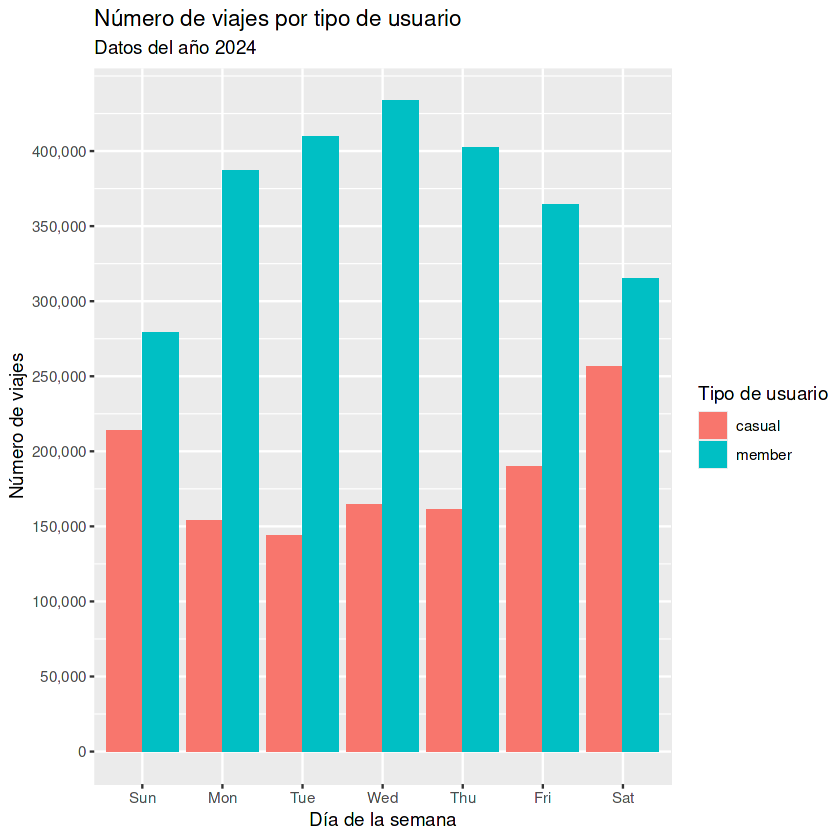

In [37]:
total_trips_2024 %>%
mutate(weekday = wday(started_at, label = TRUE)) %>%
group_by(member_casual, weekday) %>%
summarise(number_of_rides = n()
,average_duration = mean(trip_duration)) %>%
arrange(member_casual, weekday) %>%
ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
geom_col(position = "dodge") + 
  labs(title = "Número de viajes por tipo de usuario",
       subtitle = "Datos del año 2024",
       x="Día de la semana", 
       y="Número de viajes", 
       fill = "Tipo de usuario") +
  scale_y_continuous(breaks = seq(0, 400000, 50000), labels = scales::comma)

De la figura anterior vemos que los suscriptores realizan un mayor número de viajes durante la semana mientras que en los fines de semana tanto suscriptores como usuarios casuales realizan un número de viajes muy similar. Hagamos lo mismo pero ahora con la duración de los viajes:

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


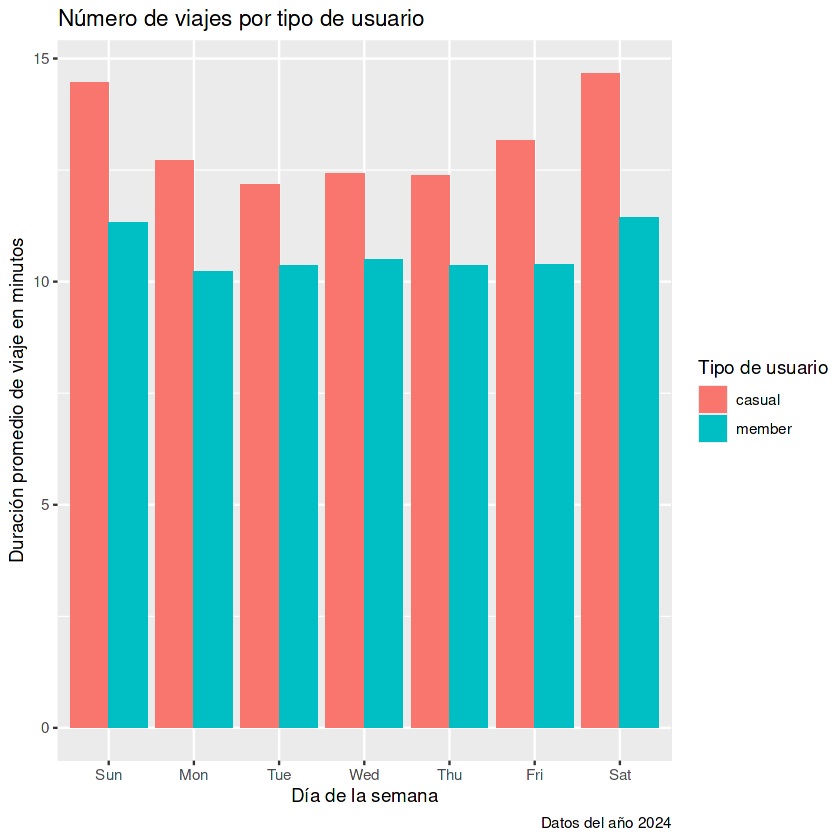

In [38]:
total_trips_2024 %>%
mutate(weekday = wday(started_at, label = TRUE)) %>%
group_by(member_casual, weekday) %>%
summarise(number_of_rides = n()
,average_duration = mean(trip_duration)) %>%
arrange(member_casual, weekday) %>%
ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
geom_col(position = "dodge") + 
  labs(title = "Número de viajes por tipo de usuario",
       caption = "Datos del año 2024",
       x="Día de la semana", 
       y="Duración promedio de viaje en minutos", 
       fill = "Tipo de usuario") + 
  scale_y_continuous(breaks = seq(0, 35, 5))

Mientras que la duración de los viajes que hacen los suscriptores en promedio es de 10 minutos entre semana y aumenta los fines de semana un poco, los viajes que realizan los usuarios casuales siempre es mayor y cambia a lo largo de la semana siendo los fines de semana cuando más largos son los viajes. Esto podría sugerir que los usuarios casuales usan las bicicletas más por recreación mientras que los suscriptores podrían estar moviéndose de y hacia sus trabajos durante la semana. 
Ya que también tenemos datos de los meses, podemos estudiar el número de viajes y la duración promedio de estos mes con mes: 

In [39]:
total_trips_2024 %>% mutate(monthd = month(started_at, label = TRUE)) %>% 
     group_by(member_casual, monthd) %>% 
     summarise(number_of_rides = n(), average_duration = mean(trip_duration)) %>% 
     arrange(member_casual, monthd)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,monthd,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Jan,16743,9.416950
casual,Feb,34172,11.326642
casual,Mar,54299,12.563657
casual,Apr,77933,13.199351
casual,May,135585,14.054800
casual,Jun,171368,14.295376
casual,Jul,189182,14.233225
casual,Aug,191229,13.925001
casual,Sep,186427,12.921615


Para entender de mejor manera lo que dice la tabla, vamos a ponerlo de manera gráfica:

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


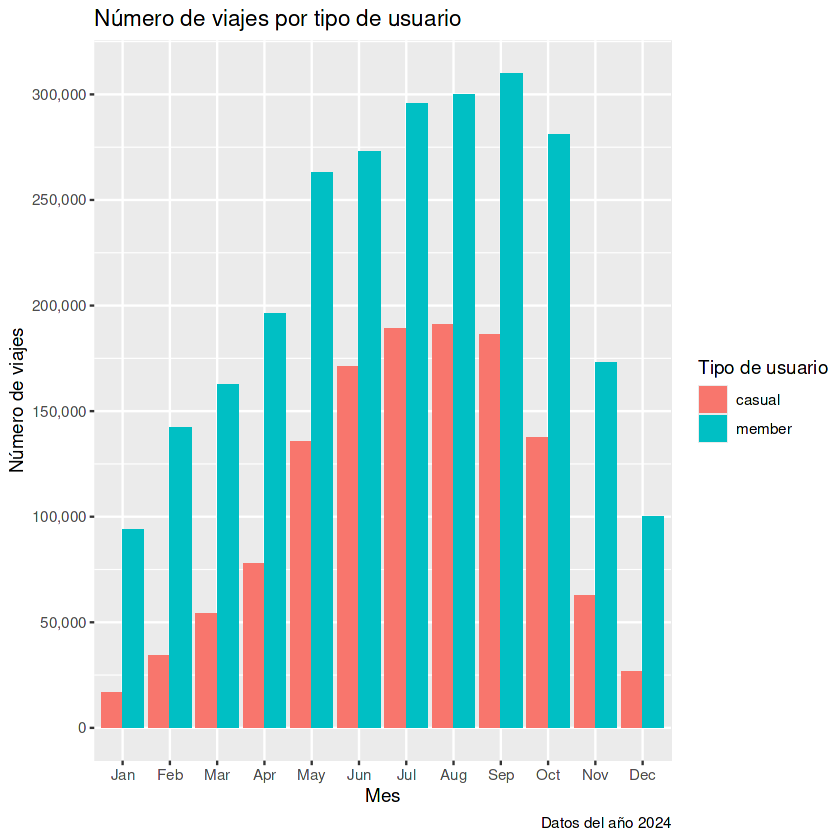

In [41]:
total_trips_2024 %>% mutate(monthd = month(started_at, label = TRUE)) %>% 
     group_by(member_casual, monthd) %>% 
     summarise(number_of_rides = n(), average_duration = mean(trip_duration)) %>% 
     arrange(member_casual, monthd) %>% 
ggplot(aes(x = monthd, y = number_of_rides, fill = member_casual)) +
geom_col(position = "dodge") + 
  labs(title = "Número de viajes por tipo de usuario",
       caption = "Datos del año 2024",
       x="Mes", 
       y="Número de viajes", 
       fill = "Tipo de usuario")+
scale_y_continuous(breaks = seq(0, 350000, 50000), labels = scales::comma)

En este gráfico podemos apreciar que la tendencia en el número de viajes por tipo de usuario se mantiene, es decir, los suscriptores realizan un mayor número de viajes a comparación de los usuarios casuales. Podemos observar además que el número de viajes se incrementa a lo largo del año, llegando a un máximo entre los meses de Julio a Septiembre y luego disminuye hacia el final. Este resultado sugiere que a los suscriptores tienen unmayor beneficio al adquirir paquetes anuales. 

Veamos si la duración de los viajes se mantiene a lo largo del año: 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


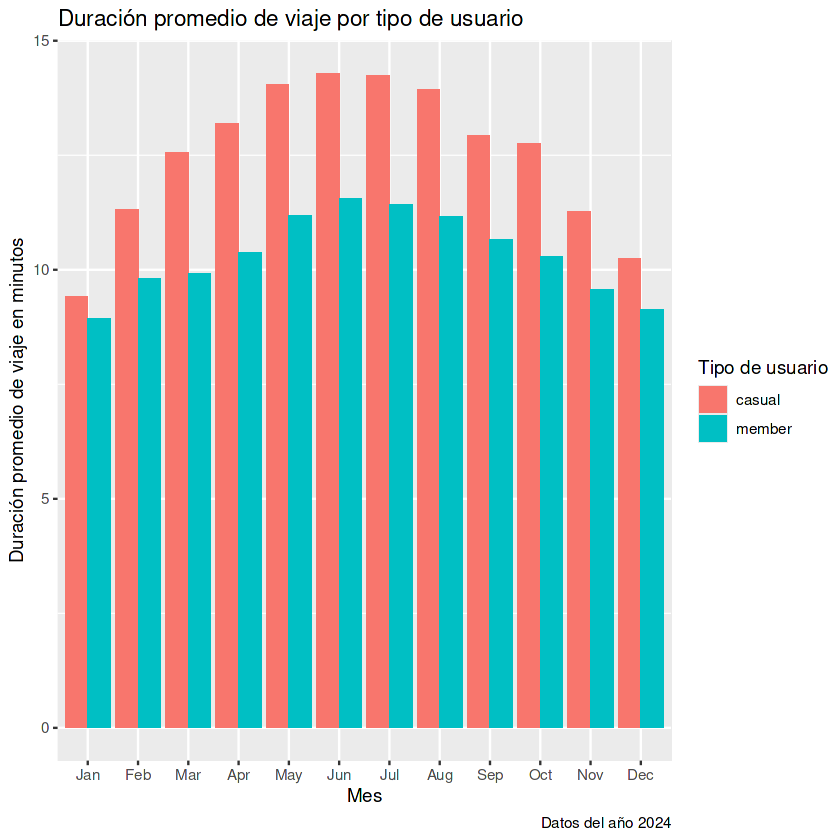

In [42]:
total_trips_2024 %>% mutate(monthd = month(started_at, label = TRUE)) %>% 
     group_by(member_casual, monthd) %>% 
     summarise(number_of_rides = n(), average_duration = mean(trip_duration)) %>% 
     arrange(member_casual, monthd) %>% 
ggplot(aes(x = monthd, y = average_duration, fill = member_casual)) +
geom_col(position = "dodge") + 
  labs(title = "Duración promedio de viaje por tipo de usuario",
       caption = "Datos del año 2024",
       x="Mes", 
       y="Duración promedio de viaje en minutos", 
       fill = "Tipo de usuario") +
  scale_y_continuous(breaks = seq(0,30,5))

# Conclusiones 

En este proyecto de análisis nos enfocamos en revisar datos de viajes en bicicleta de dos tipos de usuarios de la empresa Cyclistic: los casuales y los suscriptores. Esto con el fin de responder a una pregunta empresarial
**¿En que se diferencian los suscriptores de los usuarios casuales?**

La idea es maximizar el número de suscriptores anuales con el fin de hacer crecer el negocio de renta de bicicletas. Después de limpiar, procesar y analizar los datos, hemos llegado a las siguientes conclusiones: 

1. Los suscriptores realizan un mayor número de viajes de corta duración mientras que los usuarios casuales suelen hacer viajes largos pero
en menor cantidad. 

2. Esta diferencia se mantiene a lo largo de los meses y a lo largo de cada semana.

3. Los suscriptores suelen usar más la bicicleta en la semana mientras que los usuarios casuales la usan más en los fines de semana.

4. Los viajes de los suscriptores suelen tener la misma duración en promedio, mientras que los de los usuarios casuales fluctúa. 


# Gráficos extra
En esta sección agregamos algunos gráficos que podrían ayudar a los interesados

## El tipo de bicicleta que más usan los suscriptores y los usuarios casuales

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


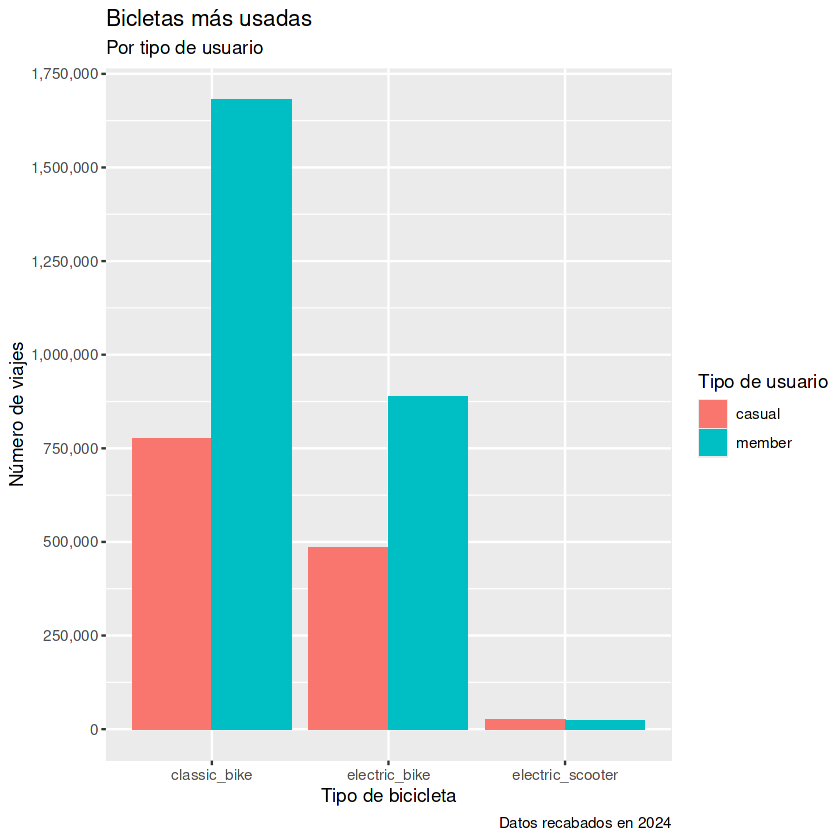

In [43]:
total_trips_2024 %>% group_by(member_casual, rideable_type) %>%
     summarise(number_of_rides = n()) %>% 
     arrange(member_casual, rideable_type) %>% 
     ggplot(aes(x=rideable_type, y=number_of_rides, fill=member_casual)) + 
      geom_col(position="dodge") + 
      labs(title = "Bicletas más usadas",
           subtitle = "Por tipo de usuario",
           x="Tipo de bicicleta",
           y="Número de viajes",
           fill="Tipo de usuario",
           caption = "Datos recabados en 2024") +
      scale_y_continuous(breaks = seq(0, 2500000, 250000), labels = scales::comma)